In [698]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import re
from math import *
from scipy import stats
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pwd

u'/Users/jackenyeart/Desktop/ScrapyProject/nfl/nfl/spiders'

In [21]:
NFL = pd.read_csv('NFLMERGEDFINAL.csv', index_col = 0)

In [6]:
pd.set_option('display.max_columns', 50)

In [22]:
NFL.head()

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1


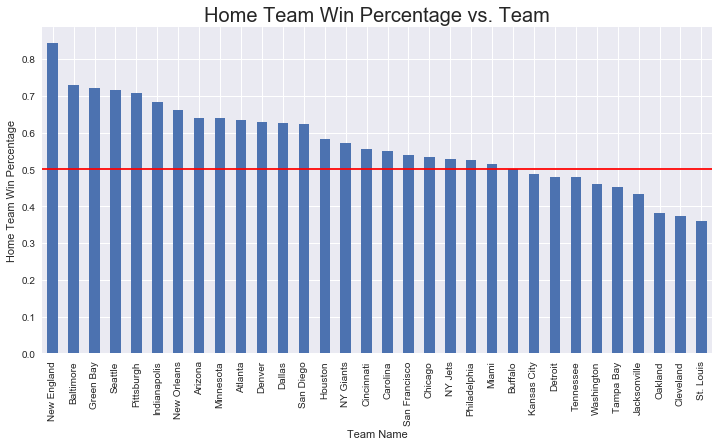

In [278]:
#First let's look at individual teams performance over this time span:
plt.figure(figsize=(12,6))
NFL.groupby('Home')['Homewins'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Team Name')
plt.ylabel('Home Team Win Percentage')
plt.title('Home Team Win Percentage vs. Team', fontsize=20)
plt.plot((-1, 39), (.5, .5), color = 'red')
#Later we'll compare the number of expected wins (as inferred by vegas lines) to win %s

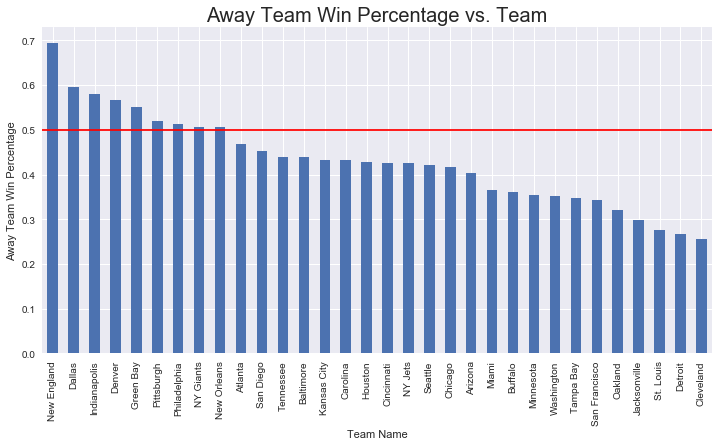

In [279]:
plt.figure(figsize=(12,6))
NFL.groupby('Away')['Awaywins'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Team Name')
plt.ylabel('Away Team Win Percentage')
plt.title('Away Team Win Percentage vs. Team', fontsize=20)
plt.plot((-1, 39), (.5, .5), color = 'red')

str

(array([ 188.,  362.,  303.,  341.,  277.,  308.,  219.,  179.,  109.,   76.]),
 array([ 0.5 ,  0.54,  0.58,  0.62,  0.66,  0.7 ,  0.74,  0.78,  0.82,
         0.86,  0.9 ]),
 <a list of 10 Patch objects>)

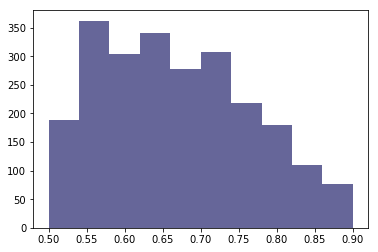

In [33]:
plt.hist(NFL['Favprob'], color="#666699",bins = 10, range = (.5,.9))

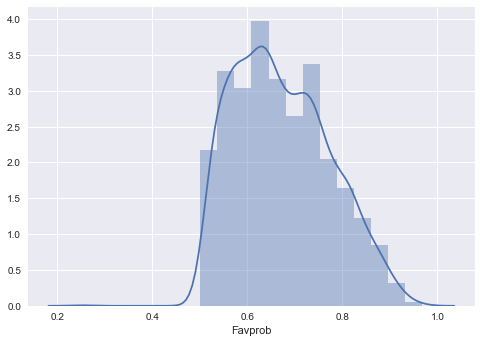

In [39]:
sns.distplot(NFL['Favprob'], bins = 20)

In [82]:
NFL.iloc[2364,:]

Date               2007-09-23
Favorite       At Kansas City
Spread                     -3
Underdog            Minnesota
Total                    33.5
Money Odds    ['-16', '+140']
Year                     2007
Week                        3
Away                Minnesota
Home              Kansas City
Favprob              0.248705
Dogprob              0.751295
Awayprob             0.751295
Homeprob             0.248705
Awayspread                  3
Homespread                 -3
Home Score                 13
Away Score                 10
Overtime?                 NaN
Homewins                    1
Over                        0
Homecover                 0.5
Totalscore                 23
Awaycover                 0.5
Awaywins                    0
Name: 2364, dtype: object

In [110]:
a = float(160)/260
b = float(100)/240

In [86]:
a/(a+b)

0.5962732919254659

In [106]:
# NFL.Favprob[2364] = a/(a+b)
NFL.set_value(2364, 'Favprob', a/(a+b))

Date               2007-09-23
Favorite       At Kansas City
Spread                     -3
Underdog            Minnesota
Total                    33.5
Money Odds    ['-16', '+140']
Year                     2007
Week                        3
Away                Minnesota
Home              Kansas City
Favprob              0.596273
Dogprob              0.403727
Awayprob             0.403727
Homeprob             0.596273
Awayspread                  3
Homespread                 -3
Home Score                 13
Away Score                 10
Overtime?                 NaN
Homewins                    1
Over                        0
Homecover                 0.5
Totalscore                 23
Awaycover                 0.5
Awaywins                    0
Name: 2364, dtype: object

In [116]:
NFL.set_value(2364, 'Dogprob', b/(a+b))

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1
5,2016-12-11,Pittsburgh,-2.0,At Buffalo,45.5,"['-130', '+110']",2016,14,Pittsburgh,Buffalo,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,20,27,NaN,0,1.0,0.0,47,1.0,1
6,2016-12-11,Arizona,-2.0,At Miami,44.0,"['-130', '+110']",2016,14,Arizona,Miami,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,26,23,NaN,1,1.0,1.0,49,0.0,0
7,2016-12-11,At Detroit,-7.5,Chicago,42.0,"['-360', '+300']",2016,14,Chicago,Detroit,0.757895,0.242105,0.242105,0.757895,7.5,-7.5,20,17,NaN,1,0.0,0.0,37,1.0,0
8,2016-12-11,Minnesota,-3.5,At Jacksonville,38.0,"['-180', '+160']",2016,14,Minnesota,Jacksonville,0.625668,0.374332,0.625668,0.374332,-3.5,3.5,16,25,NaN,0,1.0,0.0,41,1.0,1
9,2016-12-11,At Tampa Bay,-2.0,New Orleans,52.0,"['-130', '+110']",2016,14,New Orleans,Tampa Bay,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,16,11,NaN,1,0.0,1.0,27,0.0,0


In [117]:
NFL.set_value(2364, 'Homeprob', a/(a+b))

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1
5,2016-12-11,Pittsburgh,-2.0,At Buffalo,45.5,"['-130', '+110']",2016,14,Pittsburgh,Buffalo,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,20,27,NaN,0,1.0,0.0,47,1.0,1
6,2016-12-11,Arizona,-2.0,At Miami,44.0,"['-130', '+110']",2016,14,Arizona,Miami,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,26,23,NaN,1,1.0,1.0,49,0.0,0
7,2016-12-11,At Detroit,-7.5,Chicago,42.0,"['-360', '+300']",2016,14,Chicago,Detroit,0.757895,0.242105,0.242105,0.757895,7.5,-7.5,20,17,NaN,1,0.0,0.0,37,1.0,0
8,2016-12-11,Minnesota,-3.5,At Jacksonville,38.0,"['-180', '+160']",2016,14,Minnesota,Jacksonville,0.625668,0.374332,0.625668,0.374332,-3.5,3.5,16,25,NaN,0,1.0,0.0,41,1.0,1
9,2016-12-11,At Tampa Bay,-2.0,New Orleans,52.0,"['-130', '+110']",2016,14,New Orleans,Tampa Bay,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,16,11,NaN,1,0.0,1.0,27,0.0,0


In [118]:
NFL.set_value(2364, 'Awayprob', b/(a+b))

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1
5,2016-12-11,Pittsburgh,-2.0,At Buffalo,45.5,"['-130', '+110']",2016,14,Pittsburgh,Buffalo,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,20,27,NaN,0,1.0,0.0,47,1.0,1
6,2016-12-11,Arizona,-2.0,At Miami,44.0,"['-130', '+110']",2016,14,Arizona,Miami,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,26,23,NaN,1,1.0,1.0,49,0.0,0
7,2016-12-11,At Detroit,-7.5,Chicago,42.0,"['-360', '+300']",2016,14,Chicago,Detroit,0.757895,0.242105,0.242105,0.757895,7.5,-7.5,20,17,NaN,1,0.0,0.0,37,1.0,0
8,2016-12-11,Minnesota,-3.5,At Jacksonville,38.0,"['-180', '+160']",2016,14,Minnesota,Jacksonville,0.625668,0.374332,0.625668,0.374332,-3.5,3.5,16,25,NaN,0,1.0,0.0,41,1.0,1
9,2016-12-11,At Tampa Bay,-2.0,New Orleans,52.0,"['-130', '+110']",2016,14,New Orleans,Tampa Bay,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,16,11,NaN,1,0.0,1.0,27,0.0,0


In [487]:
NFL['Favorite'] = map(lambda x: x.replace('At ',''),NFL['Favorite'])
NFL['Underdog'] = map(lambda x: x.replace('At ',''),NFL['Underdog'])

In [119]:
NFL.iloc[2364,:]

Date               2007-09-23
Favorite       At Kansas City
Spread                     -3
Underdog            Minnesota
Total                    33.5
Money Odds    ['-16', '+140']
Year                     2007
Week                        3
Away                Minnesota
Home              Kansas City
Favprob              0.596273
Dogprob              0.403727
Awayprob             0.403727
Homeprob             0.596273
Awayspread                  3
Homespread                 -3
Home Score                 13
Away Score                 10
Overtime?                 NaN
Homewins                    1
Over                        0
Homecover                 0.5
Totalscore                 23
Awaycover                 0.5
Awaywins                    0
Name: 2364, dtype: object

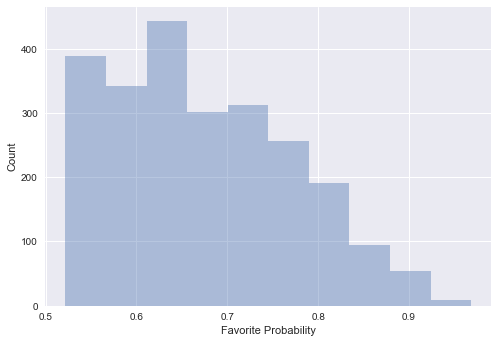

In [720]:
sns.distplot(NFL['Favprob'], bins = 10,kde=False)
plt.xlabel('Favorite Probability')
plt.ylabel('Count')

In [265]:
NFL['Favprob']

0       0.640901
1       0.542744
2       0.521739
3       0.716570
4       0.658120
5       0.542744
6       0.542744
7       0.757895
8       0.625668
9       0.542744
10      0.552594
11      0.571116
12      0.579832
13      0.674204
14      0.642857
15      0.697987
16      0.806452
17      0.521739
18      0.521739
19      0.768786
20      0.562044
21      0.648921
22      0.596273
23      0.840000
24      0.684138
25      0.521739
26      0.757895
27      0.679245
28      0.702345
29      0.714715
          ...   
2362    0.739552
2363    0.710468
2364    0.596273
2365    0.669007
2366    0.924901
2367    0.625668
2368    0.825000
2369    0.744681
2370    0.642857
2371    0.642857
2372    0.625668
2373    0.604034
2374    0.654788
2375    0.650704
2376    0.579832
2377    0.669007
2378    0.701195
2379    0.542744
2380    0.726524
2381    0.845974
2382    0.647059
2383    0.650704
2384    0.640901
2385    0.725753
2386    0.753219
2387    0.662091
2388    0.632377
2389    0.7183

In [120]:
NFL['Favprob']

4

In [125]:
def favwin(x):
    if (x.Homeprob > 0.5 and x.Homewins == 1) or (x.Homeprob < 0.5 and x.Homewins == 0):
        return 1
    else:
        return 0

In [128]:
NFL['Favwins'] = NFL.apply(favwin, axis = 1)

In [129]:
NFL.head()

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins,Favwins
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0,1
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0,1
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0,1
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1,0
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1,1


In [201]:
np.append(np.linspace(.5,.9,16),[.925])

array([ 0.5       ,  0.52666667,  0.55333333,  0.58      ,  0.60666667,
        0.63333333,  0.66      ,  0.68666667,  0.71333333,  0.74      ,
        0.76666667,  0.79333333,  0.82      ,  0.84666667,  0.87333333,
        0.9       ,  0.925     ])

In [200]:
sorted(NFL.Favprob.unique())

[0.52173913043499998,
 0.52301719356599996,
 0.52380952381000001,
 0.52902519167600004,
 0.53246753246799994,
 0.53846153846199996,
 0.54274353876699999,
 0.55259400285600002,
 0.56204379561999995,
 0.56560283687900004,
 0.57111597374199996,
 0.57983193277300005,
 0.58821154622500005,
 0.59016393442600001,
 0.596273291925,
 0.59627329192546585,
 0.601226993865,
 0.60403436682899991,
 0.61151079136699993,
 0.61403508771899995,
 0.61871750433299999,
 0.62110960757799993,
 0.62566844919800002,
 0.62793733681500008,
 0.63010204081600008,
 0.63237665269300003,
 0.63453056080699999,
 0.63658761934100005,
 0.63885429638899993,
 0.64090079123599997,
 0.64285714285700002,
 0.64511278195499999,
 0.64705882352900002,
 0.64892086330900001,
 0.65070422535200001,
 0.65478841870800009,
 0.65648854961799996,
 0.65811965811999995,
 0.66046887631399998,
 0.66209081309399997,
 0.66364812419100006,
 0.66514459665100001,
 0.66597077244299996,
 0.66751918158599999,
 0.66900702106299992,
 0.67043777668500004

In [202]:
n = 16
binned  = pd.cut(NFL.Favprob, np.append(np.linspace(.5,.9,n),[.925]))
NFL['Favbinned'] = binned
agged = NFL[NFL.Favprob < .925].groupby('Favbinned')['Favwins'].agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

In [203]:
agged

,count,sum,min,max,mean,std
Favbinned,,,,,,
"(0.5, 0.527]",113,64,0,1,0.566372,0.497783
"(0.527, 0.553]",198,113,0,1,0.570707,0.496230
"(0.553, 0.58]",239,123,0,1,0.514644,0.500834
"(0.58, 0.607]",181,96,0,1,0.530387,0.500460
"(0.607, 0.633]",240,140,0,1,0.583333,0.494037
"(0.633, 0.66]",224,142,0,1,0.633929,0.482808
"(0.66, 0.687]",181,110,0,1,0.607735,0.489610
"(0.687, 0.713]",173,120,0,1,0.693642,0.462319
"(0.713, 0.74]",231,164,0,1,0.709957,0.454767


In [174]:
(float(NFL.Favbinned[0].split(', ')[0][1:])+float(NFL.Favbinned[0].split(', ')[1][:-1]))/2

0.6465000000000001

In [181]:
max(NFL.Favprob)

0.96841374522699997

In [204]:
def favbinnedmidpoint(x):
    l = x.Favbinned.split(', ')
    m = (float(l[0][1:])+float(l[1][:-1]))/2
    return m

In [209]:
NFL['FavbinnedMP'] = NFL[NFL.Favprob < .925].apply(favbinnedmidpoint, axis = 1)

In [212]:
agged = NFL[NFL.Favprob < .925].groupby('Favbinned')['Favwins','FavbinnedMP'].agg('mean')

In [227]:
agged.reset_index()['Favbinned']

0       (0.5, 0.527]
1     (0.527, 0.553]
2      (0.553, 0.58]
3      (0.58, 0.607]
4     (0.607, 0.633]
5      (0.633, 0.66]
6      (0.66, 0.687]
7     (0.687, 0.713]
8      (0.713, 0.74]
9      (0.74, 0.767]
10    (0.767, 0.793]
11     (0.793, 0.82]
12     (0.82, 0.847]
13    (0.847, 0.873]
14      (0.873, 0.9]
15      (0.9, 0.925]
Name: Favbinned, dtype: category
Categories (16, object): [(0.5, 0.527] < (0.527, 0.553] < (0.553, 0.58] < (0.58, 0.607] ... (0.82, 0.847] < (0.847, 0.873] < (0.873, 0.9] < (0.9, 0.925]]

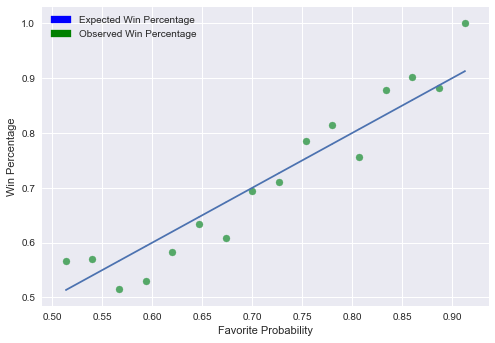

In [653]:
# sns.lmplot('FavbinnedMP', 'FavbinnedMP', agged.reset_index())
plt.scatter(agged['FavbinnedMP'], agged['FavbinnedMP'], agged['Favwins'])
plt.plot(np.unique(agged.FavbinnedMP), np.poly1d(np.polyfit(agged.FavbinnedMP, agged.FavbinnedMP, 1))(np.unique(agged.FavbinnedMP)))
plt.scatter(agged['FavbinnedMP'], agged['Favwins'])
plt.xlabel('Favorite Probability')
plt.ylabel('Win Percentage')
green_patch = mpatches.Patch(color='green', label='Observed Win Percentage')
blue_patch = mpatches.Patch(color='blue', label='Expected Win Percentage')
plt.legend(handles=[blue_patch, green_patch])

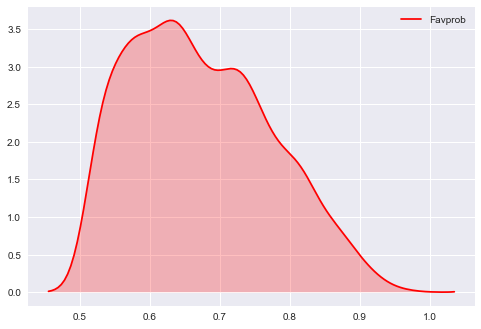

In [656]:
sns.kdeplot(NFL['Favprob'], shade=True, color = 'red')

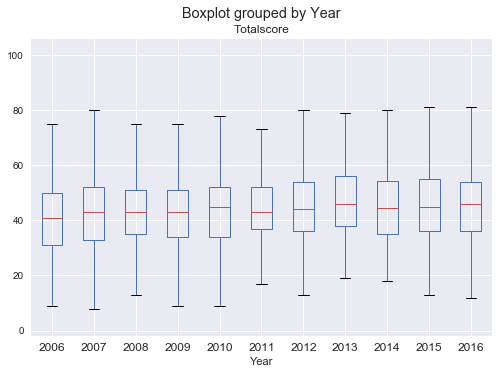

In [280]:
plt.figure(figsize=(12,6))
NFL.sort_values('Year', ascending = True).boxplot(by='Year', column='Totalscore')

In [357]:
#Top gambling states, New York, New Jersey, Pennsylvania,Illinois, Indiana, Louisana (All top 10 in casino revenue)
#Texas, Florida, Massachusetts 
#Want to see who wins above/below average:
Selectedcities = ['NY Giants','NY Jets','Philadelphia','Chicago','Indianapolis','New Orleans','Dallas','Miami','Tampa Bay','New England']
A = NFL.groupby('Home')['Homewins','Homeprob'].mean().reset_index()
B = A[map(lambda x: x in Selectedcities, A.Home)]
B = B.set_index(['Home'])
B['Net'] = B['Homewins']-B['Homeprob']
B['Net']
B = B.sort_values('Net')
B

,Homewins,Homeprob,Net
Home,,,
Philadelphia,0.526316,0.631294,-0.104979
NY Giants,0.571429,0.628092,-0.056663
Chicago,0.532468,0.586293,-0.053825
Tampa Bay,0.452055,0.494593,-0.042539
Dallas,0.626667,0.661644,-0.034977
NY Jets,0.527778,0.555011,-0.027233
Miami,0.513889,0.531488,-0.017599
New Orleans,0.662162,0.666384,-0.004222
Indianapolis,0.684211,0.625687,0.058524


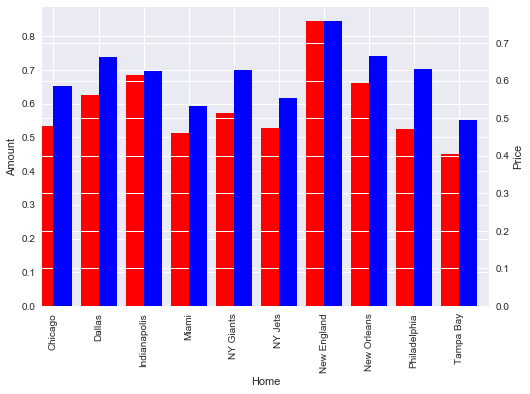

In [336]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

B.Homewins.plot(kind='bar', color='red', ax=ax, width=width, position=1)
B.Homeprob.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

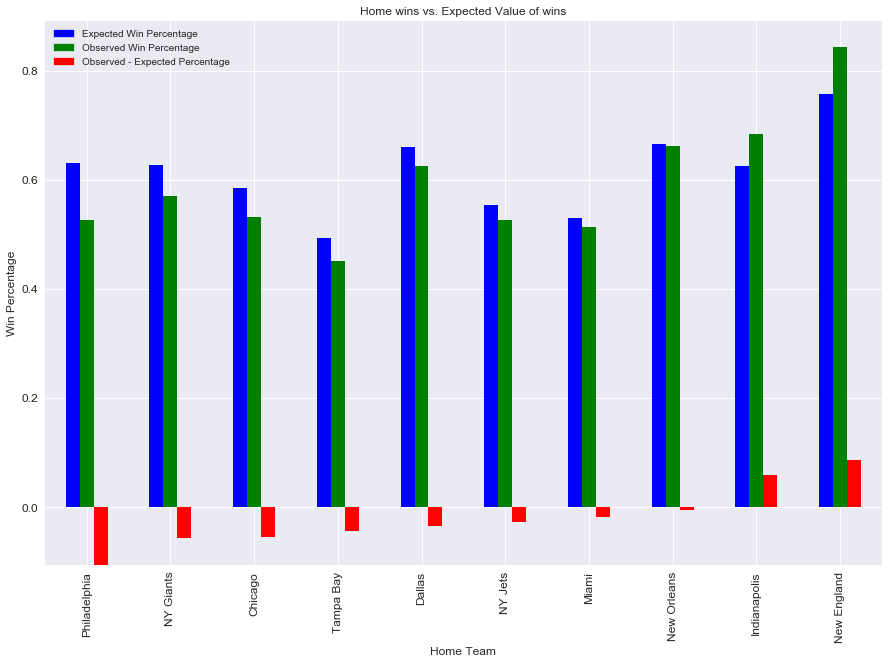

In [358]:
ax = B[['Homeprob','Homewins',"Net"]].plot(kind='bar', title ="Home wins vs. Expected Value of wins", figsize=(15, 10), legend=False, fontsize=12, color = ['blue','green','red'])
ax.set_xlabel("Home Team", fontsize=12)
ax.set_ylabel("Win Percentage", fontsize=12)
green_patch = mpatches.Patch(color='blue', label='Expected Win Percentage')
blue_patch = mpatches.Patch(color='green', label='Observed Win Percentage')
red_patch = mpatches.Patch(color = 'red', label= '(Obs-Exp) Percentage')
plt.legend(handles=[green_patch, blue_patch,red_patch])
plt.show()

In [ ]:
T = pd.DataFrame()

In [394]:
H1 = NFL.groupby('Home')['Homewins','Homeprob'].agg(['mean','sum','count']).reset_index()
A1 = NFL.groupby('Away')['Awaywins','Awayprob'].agg(['mean','sum','count']).reset_index()
T = pd.merge(H1,A1, left_on = 'Home', right_on = 'Away')
T['Totalwins'] = T.apply(lambda x: x.Homewins['sum']+x.Awaywins['sum'], axis = 1)
T['Totalcount'] = T.apply(lambda x: x.Homewins['count']+x.Awaywins['count'],axis = 1)
T['Totalprob'] = T.apply(lambda x: x.Homeprob['sum']+x.Awayprob['sum'],axis = 1)

In [396]:
T.head()

Home  Homewins            Homeprob                        Away  \
                  mean sum count      mean        sum count              
0    Arizona  0.640000  48    75  0.563254  42.244085    75    Arizona   
1    Atlanta  0.635135  47    74  0.584033  43.218460    74    Atlanta   
2  Baltimore  0.730769  57    78  0.648185  50.558417    78  Baltimore   
3    Buffalo  0.500000  34    68  0.495431  33.689294    68    Buffalo   
4   Carolina  0.550000  44    80  0.561532  44.922543    80   Carolina   

   Awaywins            Awayprob                  Totalwins Totalcount  \
       mean sum count      mean        sum count                        
0  0.402597  31    77  0.422477  32.530723    77        79        152   
1  0.467532  36    77  0.447381  34.448348    77        83        151   
2  0.438356  32    73  0.492457  35.949385    73        89        151   
3  0.360000  27    75  0.349762  26.232175    75        61        143   
4  0.432432  32    74  0.420735  31.134362    74        76        154   

   Totalprob  
              
0  74.774808  
1  77.666808  
2  86.507802  
3  59.921469  
4  76.056906

In [405]:
Total = pd.DataFrame()

In [406]:
Total['Home'] = T['Home']


Total['WinPercentage'] = T['Totalwins']/T['Totalcount']
Total['ExpectedWinPercentage'] = T['Totalprob']/T['Totalcount']

In [408]:
Total['Net'] = Total['WinPercentage'] - Total['ExpectedWinPercentage']

In [409]:
Total.head()

,Home,WinPercentage,ExpectedWinPercentage,Net
0,Arizona,0.519737,0.491940,0.027797
1,Atlanta,0.549669,0.514350,0.035319
2,Baltimore,0.589404,0.572899,0.016505
3,Buffalo,0.426573,0.419031,0.007542
4,Carolina,0.493506,0.493876,-0.000370


In [760]:
Total = Total.sort_values('Net')
# Total.set_index('Home')
# Total = Total.drop(['level_0','index'], 1)
# Total = Total.reset_index()
Total2 = Total[map(lambda x: x in Selectedcities, Total.Home)]
# Total2 = Total2.reset_index()
Total2 = Total2.set_index('Home')
Total2

,WinPercentage,ExpectedWinPercentage,Net
Home,,,
Philadelphia,0.519737,0.564271,-0.044535
Chicago,0.476510,0.497567,-0.021057
Miami,0.440559,0.453570,-0.013010
Tampa Bay,0.398649,0.410107,-0.011459
New Orleans,0.582781,0.593460,-0.010679
NY Jets,0.475862,0.479694,-0.003832
NY Giants,0.540541,0.543859,-0.003318
Dallas,0.610738,0.582355,0.028383
Indianapolis,0.631579,0.554450,0.077129


In [772]:
Total = Total.set_index('Home')
Total.head()

,WinPercentage,ExpectedWinPercentage,Net
Home,,,
Detroit,0.375000,0.431434,-0.056434
Cleveland,0.315436,0.368033,-0.052597
Philadelphia,0.519737,0.564271,-0.044535
Jacksonville,0.364865,0.408179,-0.043314
St. Louis,0.317881,0.359410,-0.041530


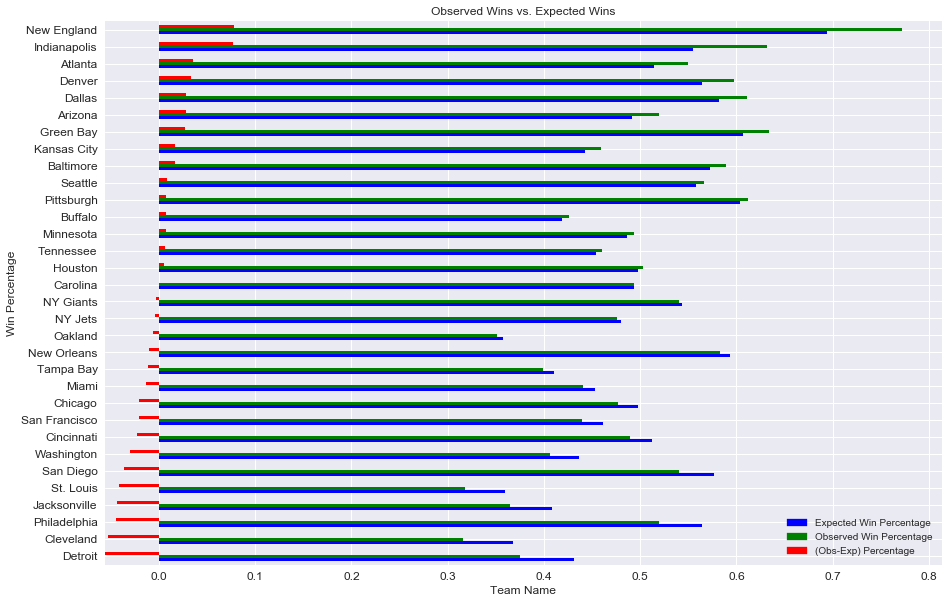

In [773]:
ax = Total[['ExpectedWinPercentage','WinPercentage',"Net"]].plot(kind='barh', title ="Observed Wins vs. Expected Wins", figsize=(15, 10), legend=False, fontsize=12, color = ['blue','green','red'])
ax.set_xlabel("Team Name", fontsize=12)
ax.set_ylabel("Win Percentage", fontsize=12)
green_patch = mpatches.Patch(color='blue', label='Expected Win Percentage')
blue_patch = mpatches.Patch(color='green', label='Observed Win Percentage')
red_patch = mpatches.Patch(color = 'red', label= '(Obs-Exp) Percentage')
plt.legend(handles=[green_patch, blue_patch,red_patch])
plt.show()

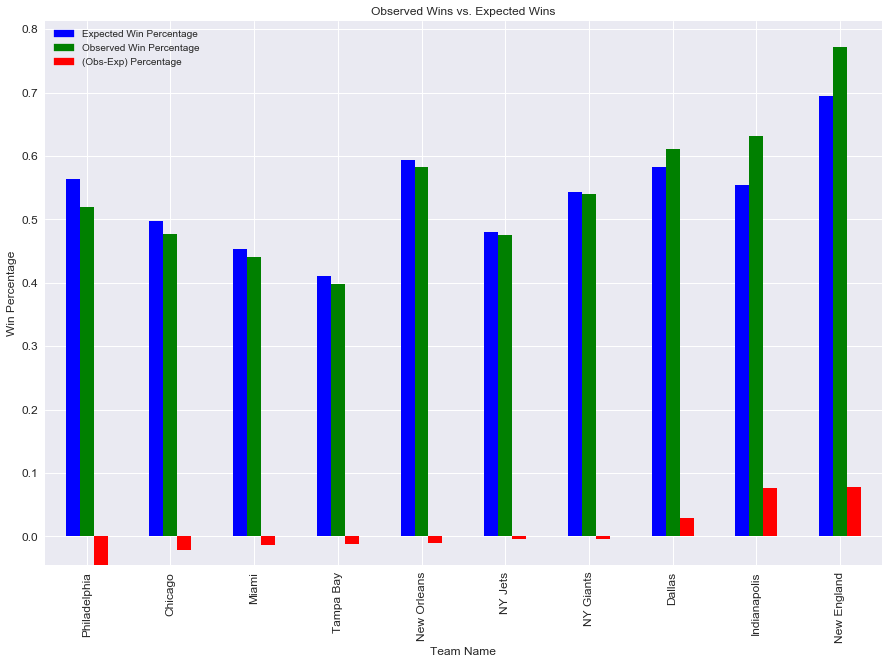

In [761]:
ax = Total2[['ExpectedWinPercentage','WinPercentage',"Net"]].plot(kind='bar', title ="Observed Wins vs. Expected Wins", figsize=(15, 10), legend=False, fontsize=12, color = ['blue','green','red'])
ax.set_xlabel("Team Name", fontsize=12)
ax.set_ylabel("Win Percentage", fontsize=12)
green_patch = mpatches.Patch(color='blue', label='Expected Win Percentage')
blue_patch = mpatches.Patch(color='green', label='Observed Win Percentage')
red_patch = mpatches.Patch(color = 'red', label= '(Obs-Exp) Percentage')
plt.legend(handles=[green_patch, blue_patch,red_patch])
plt.show()

In [421]:
Total.head()

,WinPercentage,ExpectedWinPercentage,Net
Home,,,
Detroit,0.375000,0.431434,-0.056434
Cleveland,0.315436,0.368033,-0.052597
Philadelphia,0.519737,0.564271,-0.044535
Jacksonville,0.364865,0.408179,-0.043314
St. Louis,0.317881,0.359410,-0.041530


In [444]:
Total = Total.sort_values('ExpectedWinPercentage')

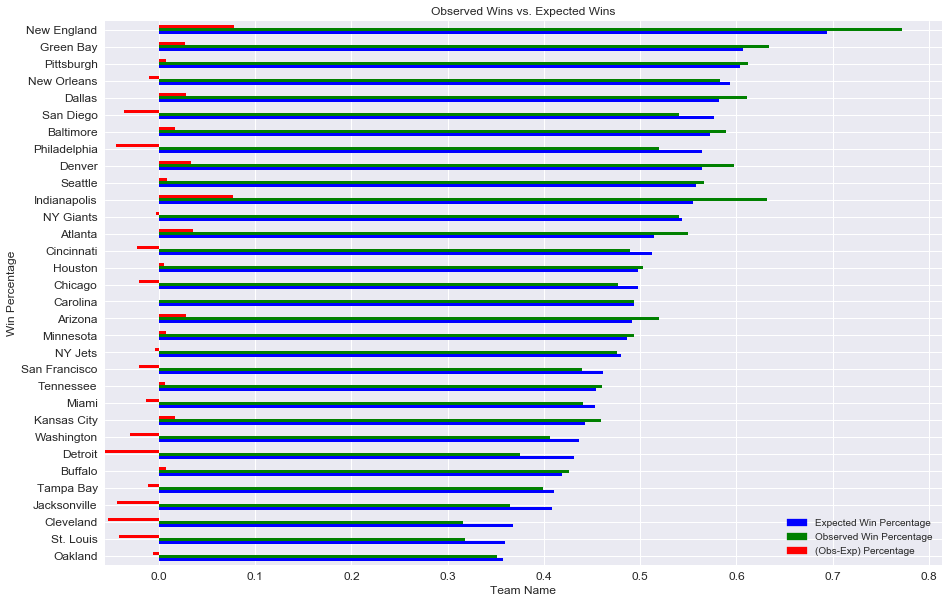

In [445]:
ax = Total[['ExpectedWinPercentage','WinPercentage',"Net"]].plot(kind='barh', title ="Observed Wins vs. Expected Wins", figsize=(15, 10), legend=False, fontsize=12, color = ['blue','green','red'])
ax.set_xlabel("Team Name", fontsize=12)
ax.set_ylabel("Win Percentage", fontsize=12)
green_patch = mpatches.Patch(color='blue', label='Expected Win Percentage')
blue_patch = mpatches.Patch(color='green', label='Observed Win Percentage')
red_patch = mpatches.Patch(color = 'red', label= '(Obs-Exp) Percentage')
plt.legend(handles=[green_patch, blue_patch,red_patch])
plt.show()

In [443]:
#Switching gears, back to favorite analysis:
NFL.mean()[['Favwins','Favprob']]

Favwins    0.659281
Favprob    0.672788
dtype: float64

In [450]:
#Consult graph above (similar to Signal/Noise Graph):
Total.head()

,WinPercentage,ExpectedWinPercentage,Net
Home,,,
Oakland,0.350993,0.357674,-0.006680
St. Louis,0.317881,0.359410,-0.041530
Cleveland,0.315436,0.368033,-0.052597
Jacksonville,0.364865,0.408179,-0.043314
Tampa Bay,0.398649,0.410107,-0.011459


In [451]:
NFL

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins,Favwins,Favbinned,FavbinnedMP
0,2016-12-08,At Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0,1,"(0.633, 0.66]",0.6465
1,2016-12-11,At Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0,1,"(0.527, 0.553]",0.5400
2,2016-12-11,At Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0,1,"(0.5, 0.527]",0.5135
3,2016-12-11,At Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1,0,"(0.713, 0.74]",0.7265
4,2016-12-11,Cincinnati,-5.0,At Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1,1,"(0.633, 0.66]",0.6465
5,2016-12-11,Pittsburgh,-2.0,At Buffalo,45.5,"['-130', '+110']",2016,14,Pittsburgh,Buffalo,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,20,27,NaN,0,1.0,0.0,47,1.0,1,1,"(0.527, 0.553]",0.5400
6,2016-12-11,Arizona,-2.0,At Miami,44.0,"['-130', '+110']",2016,14,Arizona,Miami,0.542744,0.457256,0.542744,0.457256,-2.0,2.0,26,23,NaN,1,1.0,1.0,49,0.0,0,0,"(0.527, 0.553]",0.5400
7,2016-12-11,At Detroit,-7.5,Chicago,42.0,"['-360', '+300']",2016,14,Chicago,Detroit,0.757895,0.242105,0.242105,0.757895,7.5,-7.5,20,17,NaN,1,0.0,0.0,37,1.0,0,1,"(0.74, 0.767]",0.7535
8,2016-12-11,Minnesota,-3.5,At Jacksonville,38.0,"['-180', '+160']",2016,14,Minnesota,Jacksonville,0.625668,0.374332,0.625668,0.374332,-3.5,3.5,16,25,NaN,0,1.0,0.0,41,1.0,1,1,"(0.607, 0.633]",0.6200
9,2016-12-11,At Tampa Bay,-2.0,New Orleans,52.0,"['-130', '+110']",2016,14,New Orleans,Tampa Bay,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,16,11,NaN,1,0.0,1.0,27,0.0,0,1,"(0.527, 0.553]",0.5400


In [458]:
NFL['Favorite'][0]

'At Kansas City'

In [461]:
type(map(lambda x: x.replace('At ',''),NFL['Favorite']))

list

In [462]:
trialstuff = NFL.copy(deep = True)

In [464]:
trialstuff['Favorite'] = map(lambda x: x.replace('At ',''),NFL['Favorite'])

In [468]:
len(trialstuff.Favorite.unique())

32

In [573]:
NFL.loc[:,['Home','Favorite','Away','Underdog','Spread','Home Score','Away Score','Favcover','Dogcover']]

,Home,Favorite,Away,Underdog,Spread,Home Score,Away Score,Favcover,Dogcover
0,Kansas City,Kansas City,Oakland,Oakland,-3.5,21,13,1,0
1,Tennessee,Tennessee,Denver,Denver,-2.0,13,10,1,0
2,Carolina,Carolina,San Diego,San Diego,-1.0,28,16,1,0
3,Indianapolis,Indianapolis,Houston,Houston,-6.5,17,22,0,1
4,Cleveland,Cincinnati,Cincinnati,Cleveland,-5.0,10,23,1,0
5,Buffalo,Pittsburgh,Pittsburgh,Buffalo,-2.0,20,27,1,0
6,Miami,Arizona,Arizona,Miami,-2.0,26,23,0,1
7,Detroit,Detroit,Chicago,Chicago,-7.5,20,17,0,1
8,Jacksonville,Minnesota,Minnesota,Jacksonville,-3.5,16,25,1,0
9,Tampa Bay,Tampa Bay,New Orleans,New Orleans,-2.0,16,11,1,0


In [477]:
#https://fivethirtyeight.com/features/why-people-bet-on-the-favorite-even-when-the-spread-favors-the-underdog/
#https://www.stat.berkeley.edu/~aldous/157/Papers/Levitt_Gambling_2004.pdf
# NFL['Favcover'] = 
NFL['Favcover'] = NFL.apply(lambda x: (x.Favorite == x.Home and x.Homecover == 1 and x['Overtime?'] != 'Y') or (x.Favorite == x.Away and x.Homecover == 0 and x['Overtime?'] != 'Y'),axis = 1)


In [478]:
sum(NFL['Favcover'])/float(len(NFL))

0.46279264214046822

In [591]:
NFL['Dogcover'] = NFL.apply(lambda x: ((x.Underdog == x.Home) and ((x['Home Score']-x['Away Score'] > x.Spread)))
                            or ((x.Underdog == x.Away) and ((x['Away Score']-x['Home Score'] > x.Spread)))
                            or x['Overtime?'] == 'Y', axis = 1)

In [592]:
NFL['Favcover'] = NFL.apply(lambda x: ((x.Favorite == x.Home) and ((x['Away Score']-x['Home Score'] < x.Spread)) 
                            or ((x.Favorite == x.Away) and ((x['Home Score']-x['Away Score'] < x.Spread)))) and 
                            x['Overtime?'] != 'Y', axis = 1)

In [593]:
def boolcheck(x):
    if x == True:
        return 1
    else:
        return 0

In [594]:
NFL['Dogcover'] = map(boolcheck,NFL.Dogcover)

In [595]:
NFL['Favcover'] = map(boolcheck,NFL.Favcover)

In [614]:
NFL['Spreadpush'] = NFL.apply(lambda x: x.Dogcover ==0 and  x.Favcover == 0, axis = 1)
NFL['Spreadpush'] = map(boolcheck,NFL.Spreadpush)

In [610]:
NFL.loc[:,['Home','Favorite','Away','Underdog','Spread','Home Score','Away Score','Favcover','Dogcover']][NFL.apply(lambda x: x['Favcover'] == 0 and x['Dogcover'] == 0, axis = 1)]

,Home,Favorite,Away,Underdog,Spread,Home Score,Away Score,Favcover,Dogcover
161,Washington,Philadelphia,Philadelphia,Washington,-2.0,19,21,0,0
204,Indianapolis,Indianapolis,Houston,Houston,-7.0,17,10,0,0
226,Carolina,Carolina,NY Jets,NY Jets,-10.0,30,20,0,0
255,St. Louis,Cincinnati,Cincinnati,St. Louis,-7.0,13,20,0,0
280,Buffalo,New England,New England,Buffalo,-7.0,10,17,0,0
345,Miami,Miami,NY Jets,NY Jets,-4.0,27,23,0,0
348,St. Louis,Carolina,Carolina,Los Angeles,-3.0,10,13,0,0
352,Seattle,Seattle,Buffalo,Buffalo,-6.0,31,25,0,0
368,Cincinnati,Cincinnati,Jacksonville,Jacksonville,-10.0,33,23,0,0
504,Tennessee,Tennessee,Jacksonville,Jacksonville,-3.0,42,39,0,0


In [620]:
sum(NFL['Favcover'])

1107

In [621]:
sum(NFL['Dogcover'])

1226

In [623]:
float(1107)/(1107+1226)

0.4744963566223746

In [601]:
len(NFL)

2392

In [618]:
sum(NFL.Homecover)

1161.0

In [619]:
sum(NFL.Awaycover)

1231.0

In [613]:
int(-5.5)

-5

In [624]:
(.475-.5)*sqrt(2300)/(.5)

-2.3979157616563618

In [627]:
NFL.head()

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins,Favwins,Favbinned,FavbinnedMP,Favcover,Dogcover,Spreadpush
0,2016-12-08,Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0,1,"(0.633, 0.66]",0.6465,1,0,0
1,2016-12-11,Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0,1,"(0.527, 0.553]",0.5400,1,0,0
2,2016-12-11,Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0,1,"(0.5, 0.527]",0.5135,1,0,0
3,2016-12-11,Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1,0,"(0.713, 0.74]",0.7265,0,1,0
4,2016-12-11,Cincinnati,-5.0,Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1,1,"(0.633, 0.66]",0.6465,1,0,0


In [640]:
sum(NFL.Away == NFL.Favorite)
sum(NFL.apply(lambda x: x.Away == x.Favorite and x.Awaycover == 1, axis = 1))

395

804

In [671]:
NFL.loc[:,['Date','Home','Away','Favorite','Spread','Money Odds','Favprob','Total','Home Score','Away Score']].head()

,Date,Home,Away,Favorite,Spread,Money Odds,Favprob,Total,Home Score,Away Score
0,2016-12-08,Kansas City,Oakland,Kansas City,-3.5,"['-195', '+170']",0.640901,46.0,21,13
1,2016-12-11,Tennessee,Denver,Tennessee,-2.0,"['-130', '+110']",0.542744,44.0,13,10
2,2016-12-11,Carolina,San Diego,Carolina,-1.0,"['-120', '+100']",0.521739,48.5,28,16
3,2016-12-11,Indianapolis,Houston,Indianapolis,-6.5,"['-290', '+240']",0.716570,47.5,17,22
4,2016-12-11,Cleveland,Cincinnati,Cincinnati,-5.0,"['-220', '+180']",0.658120,41.5,10,23


In [675]:
NFL['Spread'].mean()

-5.432274247491639

In [679]:
(NFL.Over).mean()

0.5066889632107023

In [689]:
np.std(NFL.Favwins)

0.47395103468825867

In [690]:
NFL.Favwins.mean()

0.6592809364548495

In [691]:
NFL.Favprob.mean()

0.6727883781044379

In [692]:
len(NFL)

2392

In [693]:
sqrt(len(NFL))

48.908077042549934

In [718]:
(NFL.Favwins.mean()-NFL.Favprob.mean())*sqrt(len(NFL))/(.5)

-1.3212459936916336

In [695]:
NFL.Favwins.sum()

1577

In [696]:
NFL.Favprob.sum()

1609.3098004258156

In [700]:
stats.ttest_1samp(NFL.Favwins, .6728, axis=0)

Ttest_1sampResult(statistic=-1.3947710410448884, pvalue=0.1632144528800652)

In [706]:
NFL.Favwins.mean()-NFL.Favprob.mean

-65.16404546681267

In [710]:
(np.std(NFL.Favwins)/sqrt(2392))

0.009690649548047497

In [719]:
(NFL.Favwins.mean()-NFL.Favprob.mean())/(np.std(NFL.Favwins)/sqrt(2392))

-1.3938633919859287

In [717]:
sqrt(2392)*

48.908077042549934

In [722]:
sum(NFL.Favcover)

1107

In [723]:
sum(NFL.Dogcover)

1226

In [725]:
float(1107)/(1107+1226)

0.4744963566223746

In [727]:
.1/.5*sqrt(2392)

9.781615408509987

In [728]:
stats.ttest_1samp(NFL.Favcover, .5, axis=0)

Ttest_1sampResult(statistic=-3.6488366415319864, pvalue=0.00026906901766455134)

In [731]:
((.4745-.5)/(.5))*sqrt(1107+1226)

-2.4633580738495997

In [732]:
1107+1226

2333

In [733]:
(.475-.5)/(.5)*sqrt(2333)

-2.4150569351466666

In [774]:
NFL.head()

,Date,Favorite,Spread,Underdog,Total,Money Odds,Year,Week,Away,Home,Favprob,Dogprob,Awayprob,Homeprob,Awayspread,Homespread,Home Score,Away Score,Overtime?,Homewins,Over,Homecover,Totalscore,Awaycover,Awaywins,Favwins,Favbinned,FavbinnedMP,Favcover,Dogcover,Spreadpush
0,2016-12-08,Kansas City,-3.5,Oakland,46.0,"['-195', '+170']",2016,14,Oakland,Kansas City,0.640901,0.359099,0.359099,0.640901,3.5,-3.5,21,13,NaN,1,0.0,1.0,34,0.0,0,1,"(0.633, 0.66]",0.6465,1,0,0
1,2016-12-11,Tennessee,-2.0,Denver,44.0,"['-130', '+110']",2016,14,Denver,Tennessee,0.542744,0.457256,0.457256,0.542744,2.0,-2.0,13,10,NaN,1,0.0,1.0,23,0.0,0,1,"(0.527, 0.553]",0.5400,1,0,0
2,2016-12-11,Carolina,-1.0,San Diego,48.5,"['-120', '+100']",2016,14,San Diego,Carolina,0.521739,0.478261,0.478261,0.521739,1.0,-1.0,28,16,NaN,1,0.0,1.0,44,0.0,0,1,"(0.5, 0.527]",0.5135,1,0,0
3,2016-12-11,Indianapolis,-6.5,Houston,47.5,"['-290', '+240']",2016,14,Houston,Indianapolis,0.716570,0.283430,0.283430,0.716570,6.5,-6.5,17,22,NaN,0,0.0,0.0,39,1.0,1,0,"(0.713, 0.74]",0.7265,0,1,0
4,2016-12-11,Cincinnati,-5.0,Cleveland,41.5,"['-220', '+180']",2016,14,Cincinnati,Cleveland,0.658120,0.341880,0.658120,0.341880,-5.0,5.0,10,23,NaN,0,0.0,0.0,33,1.0,1,1,"(0.633, 0.66]",0.6465,1,0,0
